# Automizando a geração de índices - 2

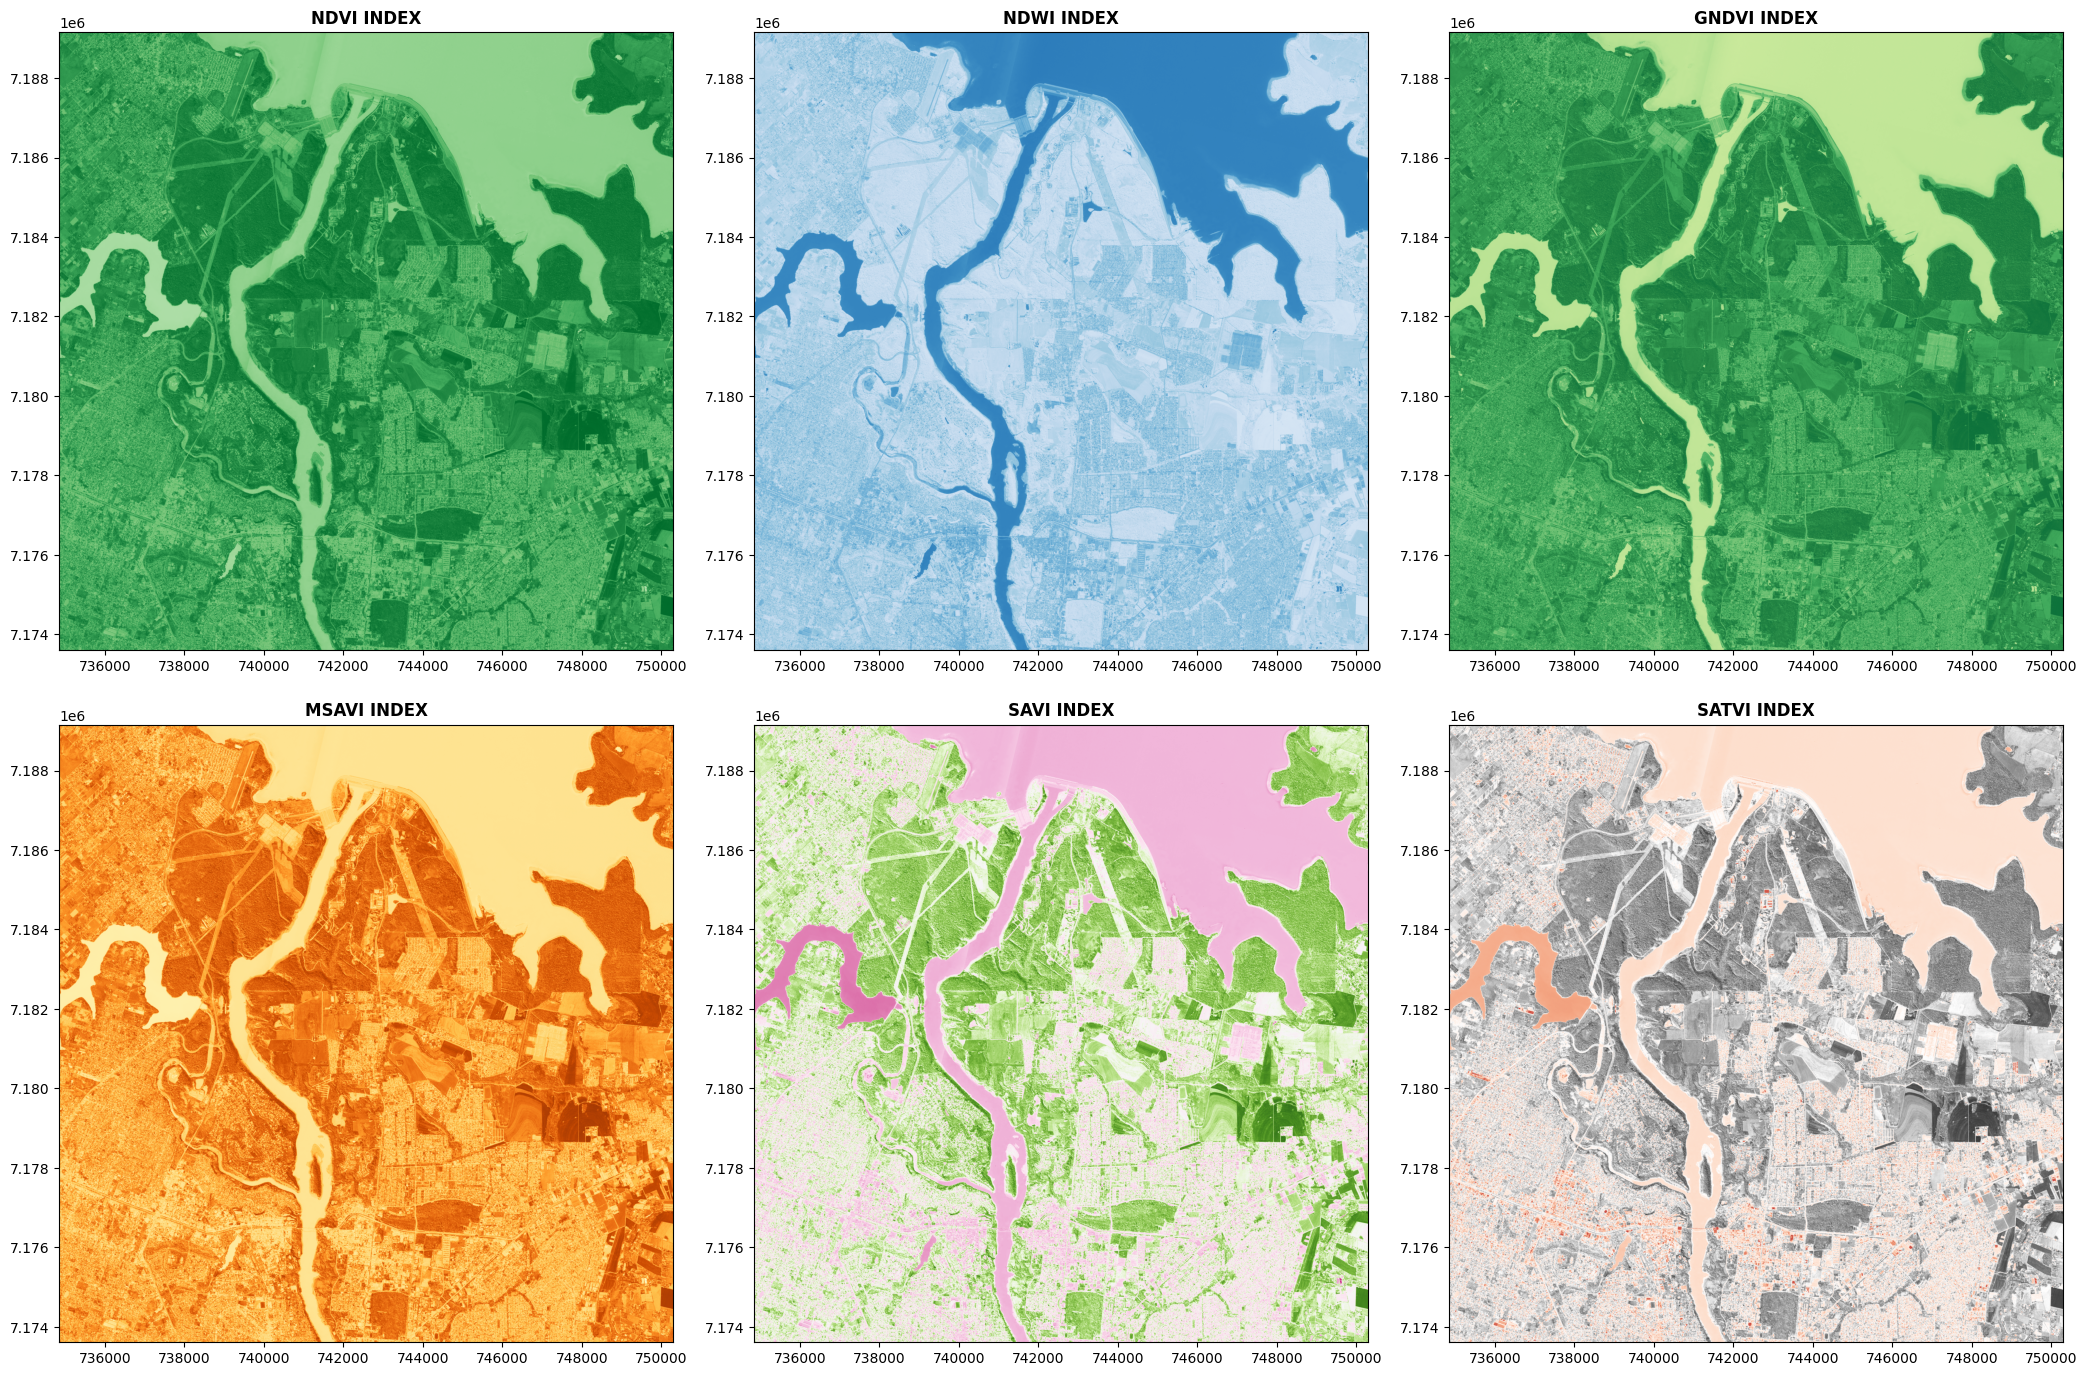

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Normalização
def normalize(array):
    return ((array - array.min())/(array.max() - array.min()))

# Abrir bandas
def cbers_raster(raster):
    with rasterio.open(raster, 'r') as dst:
        band1 = dst.read(1)  # Blue
        band2 = dst.read(2)  # Green
        band3 = dst.read(3)  # Red
        band4 = dst.read(4)  # NIR
        profile = dst.profile
    return band1, band2, band3, band4, profile

# Índices
def cbers_index():
    band1, band2, band3, band4, profile = cbers_raster(raster)

    ir = normalize(band4)
    r = normalize(band3)
    g = normalize(band2)
    b = normalize(band1)

    # Cálculos
    ndvi = (ir - r) / (ir + r)
    ndwi = (g - ir) / (g + ir)
    gndvi = (ir - g) / (ir + g)
    msavi = (2 * ir + 1 - np.sqrt((2 * ir + 1)**2 - 8 * (ir - r))) / 2
    savi = ((ir - r) / (ir + r + 0.5)) * (1.5)
    satvi = ((ir - r) / (ir + r + 0.5)) * 1.5 - (r / 2)

    return ndvi, ndwi, gndvi, msavi, savi, satvi, profile

# Plotagem
def plot_cbers():
    ndvi, nwdi, gndvi, msavi, savi, satvi, profile = cbers_index()
    fig, axs = plt.subplots(2, 3, figsize=(21, 14))

    show(ndvi, cmap='Greens', transform=profile['transform'], ax=axs[0,0], title='NDVI INDEX')
    show(nwdi, cmap='Blues', transform=profile['transform'], ax=axs[0,1], title='NDWI INDEX')
    show(gndvi, cmap='YlGn', transform=profile['transform'], ax=axs[0,2], title='GNDVI INDEX')
    show(msavi, cmap='YlOrBr', transform=profile['transform'], ax=axs[1,0], title='MSAVI INDEX')
    show(savi, cmap='PiYG', transform=profile['transform'], ax=axs[1,1], title='SAVI INDEX')
    show(satvi, cmap='RdGy', transform=profile['transform'], ax=axs[1,2], title='SATVI INDEX')

    plt.tight_layout()
    plt.show()

# Definir o arquivo raster
raster = 'cbers.tif'
plot_cbers()
